In [3]:
# Import libiaries and methods
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Confirm current working directory
Path.cwd()

WindowsPath('C:/Users/Lance/Desktop/Time-Series-Analysis_HW')

In [5]:
# Read the csv file
# Read the JPY/USD file and observe file structure
yen_futures_read = pd.read_csv(Path('yen.csv'), index_col='Date', infer_datetime_format=True,parse_dates=True)
yen_futures_read.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [6]:
yen_futures_read.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0


In [7]:
# Create a Return column in the df

In [8]:
yen_futures_read['Return'] = yen_futures_read['Settle'].pct_change() * 100

In [9]:
# Check the data (head and tail)

In [10]:
yen_futures_read.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0,NaN
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0


In [11]:
yen_futures_read.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return
Date,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509


In [12]:
yen_futures_read['Lagged_Return'] = yen_futures_read.Return.shift()

In [13]:
yen_futures_read.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0,NaN,NaN
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0,NaN
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0,0.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0,0.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0,0.0,0.0


In [14]:
yen_futures_read.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [15]:
yen_futures_read = yen_futures_read.dropna()

In [16]:
yen_futures_read.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0,-0.427829,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604


In [17]:
yen_futures_read.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [18]:
# Trim the dataset to begin on January 1st, 1990
yen_futures_read = yen_futures_read.loc["1990-01-01":, :]
yen_futures_read.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0,-0.427829,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604


In [19]:
yen_futures_read.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [20]:
yen_futures_read.shape

(1415, 10)

In [21]:
yen_futures_read.dtypes

Open                          float64
High                          float64
Low                           float64
Last                          float64
Change                        float64
Settle                        float64
Volume                        float64
Previous Day Open Interest    float64
Return                        float64
Lagged_Return                 float64
dtype: object

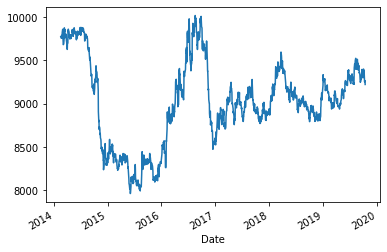

In [22]:
# Plot time v Settle
yen_futures_read.Settle.plot()

### Train/Test Split Predictions

In [23]:
# Train data timeline = 2018-2019
train = yen_futures_read[:'2018']

In [24]:
train.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2014-02-18,9831.0,9865.0,9734.0,9775.0,42.0,9775.0,203495.0,196924.0,-0.427829,0.409123
2014-02-19,9768.0,9825.0,9760.0,9773.0,2.0,9773.0,129508.0,197197.0,-0.020460,-0.427829
2014-02-20,9774.0,9837.0,9765.0,9775.0,2.0,9775.0,160202.0,198280.0,0.020465,-0.020460
2014-02-21,9772.0,9776.0,9725.0,9758.0,20.0,9755.0,103091.0,202990.0,-0.204604,0.020465
2014-02-24,9752.0,9789.0,9740.0,9757.0,2.0,9757.0,90654.0,203114.0,0.020502,-0.204604


In [25]:
train.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2018-12-24,9070.0,9133.5,9056.5,9131.0,75.5,9123.0,88418.0,216745.0,0.834485,-0.187545
2018-12-26,9140.0,9140.0,9037.0,9040.5,81.5,9041.5,118663.0,221302.0,-0.893346,0.834485
2018-12-27,9041.0,9108.0,9039.0,9063.5,42.0,9083.5,157780.0,220218.0,0.464525,-0.893346
2018-12-28,9065.5,9132.5,9065.0,9118.0,27.0,9110.5,109073.0,217413.0,0.297242,0.464525
2018-12-31,9117.5,9182.0,9104.0,9177.0,60.5,9171.0,72325.0,211634.0,0.664069,0.297242


In [26]:
# Test data timeline

In [27]:
test = yen_futures_read['2018':]

In [28]:
test.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2018-01-02,8909.5,8957.5,8898.5,8938.0,26.5,8940.5,96714.0,227884.0,0.297285,0.224871
2018-01-03,8943.0,8947.5,8913.0,8921.0,21.5,8919.0,93498.0,226582.0,-0.240479,0.297285
2018-01-04,8917.0,8920.5,8891.0,8901.0,19.0,8900.0,115434.0,224918.0,-0.213028,-0.240479
2018-01-05,8897.0,8902.0,8854.0,8878.0,31.5,8868.5,133023.0,229326.0,-0.353933,-0.213028
2018-01-08,8870.5,8889.0,8849.5,8872.5,5.5,8874.0,81647.0,237100.0,0.062017,-0.353933


In [29]:
test.tail()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,Return,Lagged_Return
Date,,,,,,,,,,
2019-10-09,9381.0,9391.5,9330.5,9343.5,38.5,9338.0,99153.0,145470.0,-0.410601,0.170931
2019-10-10,9343.5,9380.5,9293.5,9301.0,34.5,9303.5,159397.0,144474.0,-0.369458,-0.410601
2019-10-11,9308.5,9309.0,9240.0,9267.0,52.5,9251.0,158810.0,147471.0,-0.564304,-0.369458
2019-10-14,9259.0,9292.0,9250.5,9261.0,14.0,9265.0,69457.0,153902.0,0.151335,-0.564304
2019-10-15,9264.5,9280.0,9216.5,9220.0,43.5,9221.5,108342.0,151564.0,-0.469509,0.151335


In [30]:
# Create dataframes (equivalent of converting) X, y train variables

In [31]:
X_train = train[['Lagged_Return']]

In [32]:
X_train.head()

,Lagged_Return
Date,
2014-02-18,0.409123
2014-02-19,-0.427829
2014-02-20,-0.020460
2014-02-21,0.020465
2014-02-24,-0.204604


In [33]:
X_train.tail()

,Lagged_Return
Date,
2018-12-24,-0.187545
2018-12-26,0.834485
2018-12-27,-0.893346
2018-12-28,0.464525
2018-12-31,0.297242


In [34]:
y_train = train[['Return']]

In [35]:
y_train.head()

,Return
Date,
2014-02-18,-0.427829
2014-02-19,-0.020460
2014-02-20,0.020465
2014-02-21,-0.204604
2014-02-24,0.020502


In [36]:
y_train.tail()

,Return
Date,
2018-12-24,0.834485
2018-12-26,-0.893346
2018-12-27,0.464525
2018-12-28,0.297242
2018-12-31,0.664069


In [37]:
# Create dataframes (equivalent of converting) X, y test variables

In [38]:
X_test = test[['Lagged_Return']]

In [39]:
X_test.head()

,Lagged_Return
Date,
2018-01-02,0.224871
2018-01-03,0.297285
2018-01-04,-0.240479
2018-01-05,-0.213028
2018-01-08,-0.353933


In [40]:
X_test.tail()

,Lagged_Return
Date,
2019-10-09,0.170931
2019-10-10,-0.410601
2019-10-11,-0.369458
2019-10-14,-0.564304
2019-10-15,0.151335


In [41]:
y_test = test[['Return']]

In [42]:
y_test.head()

,Return
Date,
2018-01-02,0.297285
2018-01-03,-0.240479
2018-01-04,-0.213028
2018-01-05,-0.353933
2018-01-08,0.062017


In [43]:
y_test.tail()

,Return
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [44]:
#Create the model
model = LinearRegression()

In [45]:
#Fit the model to training variable X and y
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
# Predict y using X_test data
y_predict = model.predict(X_test)

In [47]:
Results = y_test

In [48]:
Results.head()

,Return
Date,
2018-01-02,0.297285
2018-01-03,-0.240479
2018-01-04,-0.213028
2018-01-05,-0.353933
2018-01-08,0.062017


In [49]:
#Add the predicted y values to the dataframe as a second column
Results['Predicted (Y) Returns'] = y_predict

In [50]:
Results.head()

,Return,Predicted (Y) Returns
Date,,
2018-01-02,0.297285,-0.006707
2018-01-03,-0.240479,-0.007568
2018-01-04,-0.213028,-0.001171
2018-01-05,-0.353933,-0.001497
2018-01-08,0.062017,0.000179


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013CF6E6E8C8>,
      dtype=object)

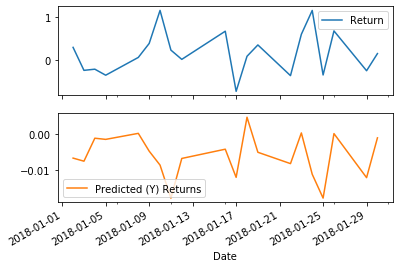

In [51]:
Results[:20].plot(subplots=True)

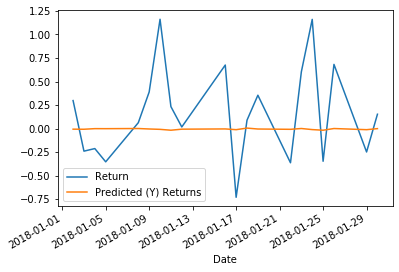

In [52]:
Results[:20].plot()

#### Evaluate the Model using Out-of-Sample Performance and In-sample Performance

Out-of-Sample Performance (X and y test data)

##### a. Mean Squared Error between y and predicted y

In [56]:
mse1 = mean_squared_error(Results.Return, Results['Out-of-Sample Predictions'])
mse1

KeyError: 'Out-of-Sample Predictions'

##### b. Out-of-Sample RMSE (Square root of the mse)

In [57]:
oos_rmse = np.sqrt(mse1)
oos_rmse

NameError: name 'mse1' is not defined

In [58]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["Return"],
    out_of_sample_results["Out-of-Sample Predictions"])

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

NameError: name 'out_of_sample_results' is not defined

#### In-Sample Performance (X and y train data)

In [59]:
# Construct a dataframe using just the y training data / convert y-train to a dataframe
in_sample_results = y_train

In [60]:
in_sample_results.dtypes

Return    float64
dtype: object

In [61]:
# Add a column called 'In-sample Predictions' to the dataframe; backtesting the model
in_sample_results['In-sample Predictions'] = model.predict(X_train)

##### a. Backtesting: Mean Squared Error between y and predicted y

In [62]:
mse2 = mean_squared_error(in_sample_results.Return, in_sample_results['In-sample Predictions'])
mse2

0.32008015896905967

##### b. Backtesting: Out-of-Sample RMSE (Square root of the mse)

In [63]:
# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
iis_rmse = np.sqrt(mse2)
iis_rmse

0.5657562717010388